# Multiclass classification: Human Physical Activities Recognition using wearable Sensors data.

In [1]:
#!pip install imblearn

In [1]:
# Libraries for Data Preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Libraries for Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries for measuring accuracy
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Libraries to ignore the future warnings 
from warnings import simplefilter

In [2]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('Dataset2.csv')
data.head()

,XAccC,XAccC.1,ZAccC,Elecar1,Elecar2,XAccLA,YAccLA,ZAccLA,XGyLA,YGyLA,...,XAccRLA,YAccRLA,ZAccRLA,XGyRLA,YGyRLA,ZGyRLA,XMagRLA,YMagRLA,ZMagRLA,Label
0,-9.1319,2.0514,-0.13116,0.083726,-0.041863,-0.77206,-9.4262,-4.9999,0.25788,-0.90807,...,-12.1360,-1.9945,0.54611,-0.59020,0.71663,0.31466,109.190,-32.688,-92.435,0
1,-8.6028,1.8569,-0.34867,0.171640,-0.008373,-4.59760,-9.2246,-2.6530,0.31354,-0.87992,...,-9.2323,-1.5408,-1.07700,-0.59020,0.71663,0.31466,105.760,-52.213,-88.337,0
2,-8.4785,1.7010,-0.80480,0.263740,0.058608,-5.00190,-8.9910,-3.0621,0.31354,-0.87992,...,-6.5812,-1.7471,-2.71240,-0.70784,0.64271,0.19612,101.540,-43.508,-93.202,0
3,-8.0197,1.9970,-0.65185,0.364210,0.054422,-2.74880,-9.2327,-2.4787,0.31354,-0.87992,...,-5.0034,-1.7464,-3.63940,-0.70784,0.64271,0.19612,93.368,-16.875,-105.910,0
4,-7.3350,1.5970,-0.37206,0.477240,0.133960,-2.98880,-8.9681,-2.7491,0.26902,-0.87430,...,-4.1554,-1.8952,-3.52180,-0.70784,0.64271,0.19612,81.305,15.553,-123.800,0


In [5]:
data.shape

(98304, 24)

In [6]:
data=data.drop_duplicates()
data.shape

(98304, 24)

In [7]:
data.isna().sum()

XAccC      0
XAccC.1    0
ZAccC      0
Elecar1    0
Elecar2    0
XAccLA     0
YAccLA     0
ZAccLA     0
XGyLA      0
YGyLA      0
ZGyLA      0
XMagLA     0
YMagLA     0
ZMagLA     0
XAccRLA    0
YAccRLA    0
ZAccRLA    0
XGyRLA     0
YGyRLA     0
ZGyRLA     0
XMagRLA    0
YMagRLA    0
ZMagRLA    0
Label      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98304 entries, 0 to 98303
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   XAccC    98304 non-null  float64
 1   XAccC.1  98304 non-null  float64
 2   ZAccC    98304 non-null  float64
 3   Elecar1  98304 non-null  float64
 4   Elecar2  98304 non-null  float64
 5   XAccLA   98304 non-null  float64
 6   YAccLA   98304 non-null  float64
 7   ZAccLA   98304 non-null  float64
 8   XGyLA    98304 non-null  float64
 9   YGyLA    98304 non-null  float64
 10  ZGyLA    98304 non-null  float64
 11  XMagLA   98304 non-null  float64
 12  YMagLA   98304 non-null  float64
 13  ZMagLA   98304 non-null  float64
 14  XAccRLA  98304 non-null  float64
 15  YAccRLA  98304 non-null  float64
 16  ZAccRLA  98304 non-null  float64
 17  XGyRLA   98304 non-null  float64
 18  YGyRLA   98304 non-null  float64
 19  ZGyRLA   98304 non-null  float64
 20  XMagRLA  98304 non-null  float64
 21  YMagRLA  983

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
XAccC,98304.0,-8.632670,4.007034,-22.3210,-9.829300,-9.467800,-7.911600,14.8570
XAccC.1,98304.0,-0.224467,2.436283,-19.8990,-1.302300,-0.613910,0.804550,20.7590
ZAccC,98304.0,-1.330394,3.091819,-18.4010,-2.572000,-1.138250,-0.306517,18.1460
Elecar1,98304.0,-0.016273,0.671487,-2.8844,-0.360020,-0.079540,0.226060,6.4260
Elecar2,98304.0,0.007541,0.475708,-4.3286,-0.238620,-0.050235,0.184200,4.1026
XAccLA,98304.0,2.831852,3.563183,-22.0910,1.296700,2.377200,3.595725,20.0130
YAccLA,98304.0,-9.617919,4.193957,-19.5800,-10.089250,-9.581000,-9.128450,20.9090
ZAccLA,98304.0,0.636321,5.290494,-19.3630,-0.274587,1.488100,2.137250,24.5990
XGyLA,98304.0,0.085483,0.431373,-2.1466,-0.204080,0.048237,0.434140,1.6308
YGyLA,98304.0,-0.594557,0.487431,-7.7899,-0.859290,-0.709190,-0.465290,1.5572


In [10]:
data.corr()

,XAccC,XAccC.1,ZAccC,Elecar1,Elecar2,XAccLA,YAccLA,ZAccLA,XGyLA,YGyLA,...,XAccRLA,YAccRLA,ZAccRLA,XGyRLA,YGyRLA,ZGyRLA,XMagRLA,YMagRLA,ZMagRLA,Label
XAccC,1.000000,0.033159,0.463661,0.004550,0.038342,0.107198,0.297042,0.095606,0.043417,0.325651,...,0.224897,0.229173,0.124007,-0.005114,0.134416,0.044987,0.138383,0.085962,-0.118716,0.150832
XAccC.1,0.033159,1.000000,-0.443651,0.010430,0.097623,-0.073753,-0.151200,-0.173744,-0.094785,-0.215615,...,0.131145,-0.115008,-0.012233,0.107939,-0.262819,-0.112083,-0.152716,-0.149997,0.139389,0.132461
ZAccC,0.463661,-0.443651,1.000000,-0.049973,-0.083339,0.055339,0.372993,0.198779,0.072872,0.451605,...,-0.055958,0.268300,0.135351,-0.101457,0.388866,0.164107,0.006915,-0.013247,-0.031143,-0.121438
Elecar1,0.004550,0.010430,-0.049973,1.000000,0.608798,0.039481,-0.029359,-0.015509,-0.024528,0.009983,...,-0.024957,-0.041583,-0.140618,-0.045499,-0.016358,-0.049345,-0.009296,0.010911,-0.001919,0.219759
Elecar2,0.038342,0.097623,-0.083339,0.608798,1.000000,0.031961,-0.027224,0.003741,0.026452,0.000200,...,-0.049526,-0.056457,-0.119191,0.014726,-0.056284,-0.070486,-0.003993,-0.020077,0.013735,0.174602
XAccLA,0.107198,-0.073753,0.055339,0.039481,0.031961,1.000000,-0.101314,-0.304219,0.088252,0.132935,...,0.054914,-0.012026,-0.035435,-0.025807,0.098760,0.036813,0.018819,0.015264,-0.041308,0.164550
YAccLA,0.297042,-0.151200,0.372993,-0.029359,-0.027224,-0.101314,1.000000,0.160990,0.059881,0.417803,...,-0.014219,0.108440,0.105933,0.002855,0.179449,0.084645,-0.046494,-0.046015,-0.046527,-0.047487
ZAccLA,0.095606,-0.173744,0.198779,-0.015509,0.003741,-0.304219,0.160990,1.000000,0.012271,0.196833,...,-0.283688,0.266596,0.047521,0.026255,0.086818,0.022724,0.032189,0.041403,0.010857,-0.100531
XGyLA,0.043417,-0.094785,0.072872,-0.024528,0.026452,0.088252,0.059881,0.012271,1.000000,0.282687,...,0.011469,-0.010725,0.034165,0.263974,0.171910,0.560179,0.016203,0.000632,-0.024055,-0.092963
YGyLA,0.325651,-0.215615,0.451605,0.009983,0.000200,0.132935,0.417803,0.196833,0.282687,1.000000,...,-0.123170,0.176219,0.121136,0.132143,0.358784,0.281282,-0.068688,-0.048681,0.077490,0.040524


<AxesSubplot:>

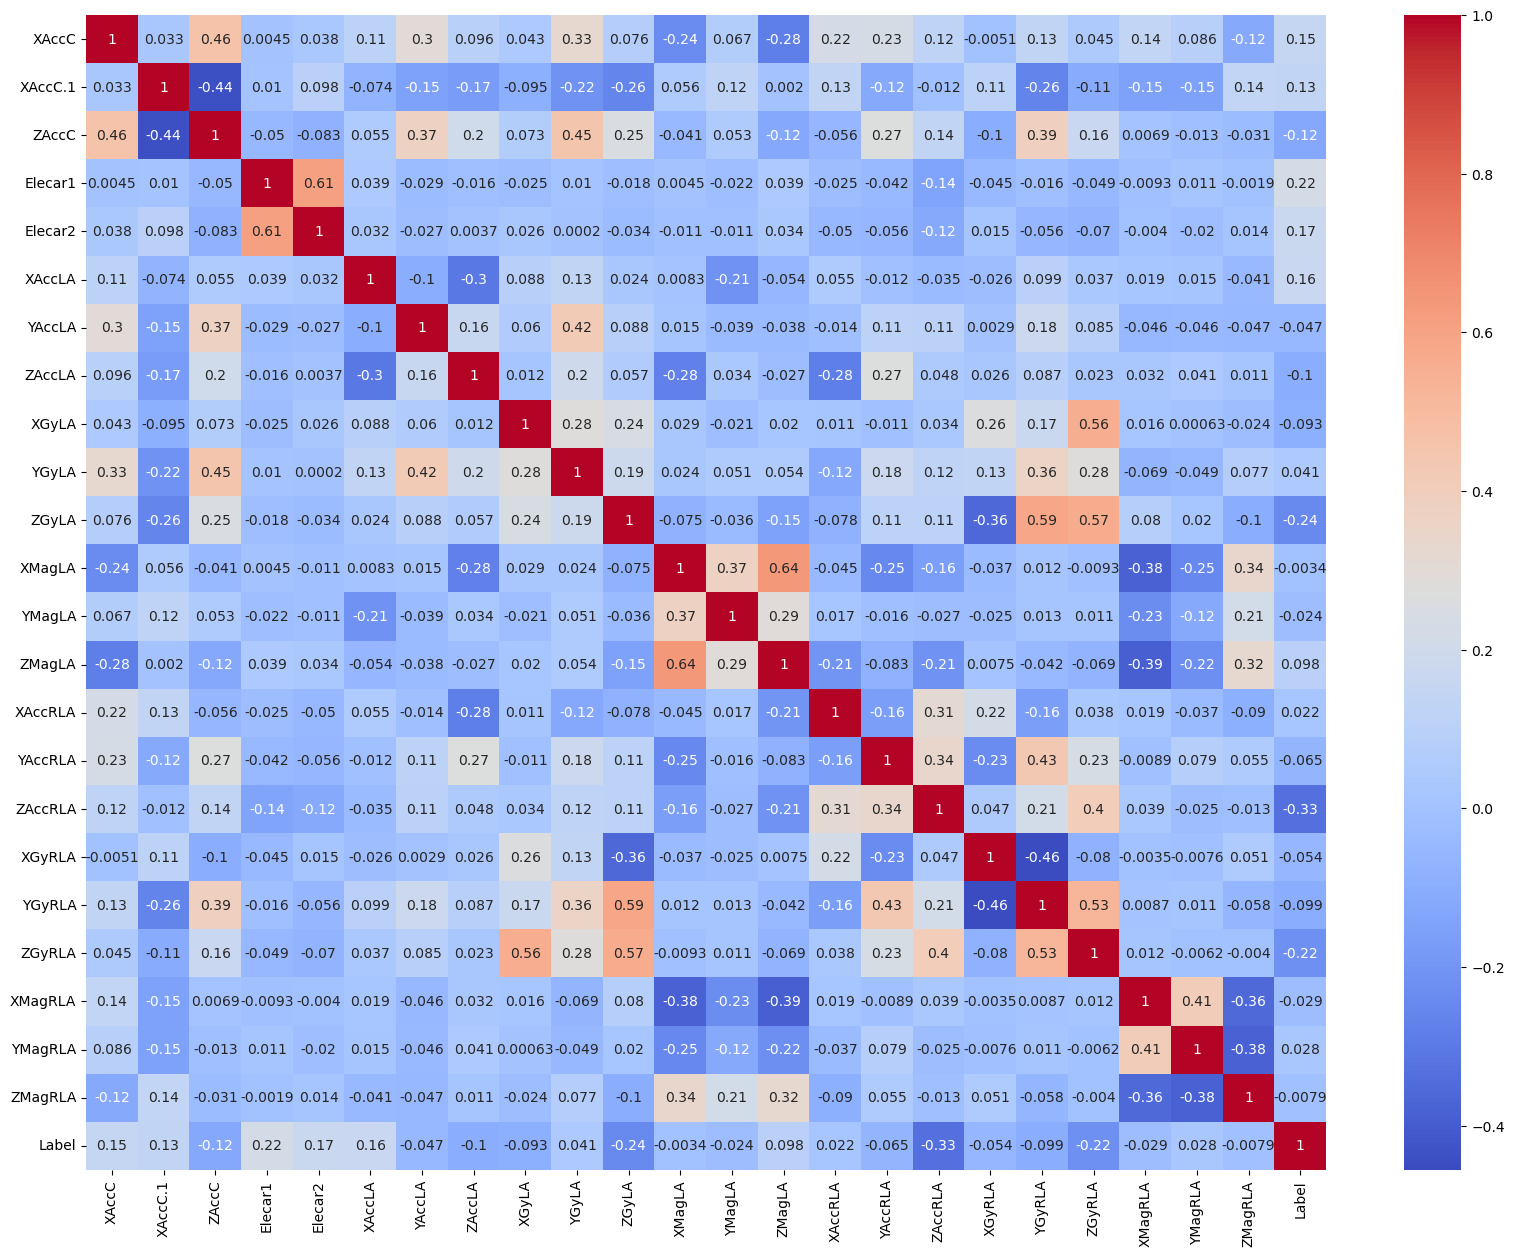

In [11]:
# This statement reduces the size of image
plt.figure(figsize=(20,15))
# plotting the graph
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [12]:
Xdata = data.drop(['Label'], axis=1)
Ydata= data['Label']
print(Xdata.shape)
print(Ydata.shape)

(98304, 23)
(98304,)


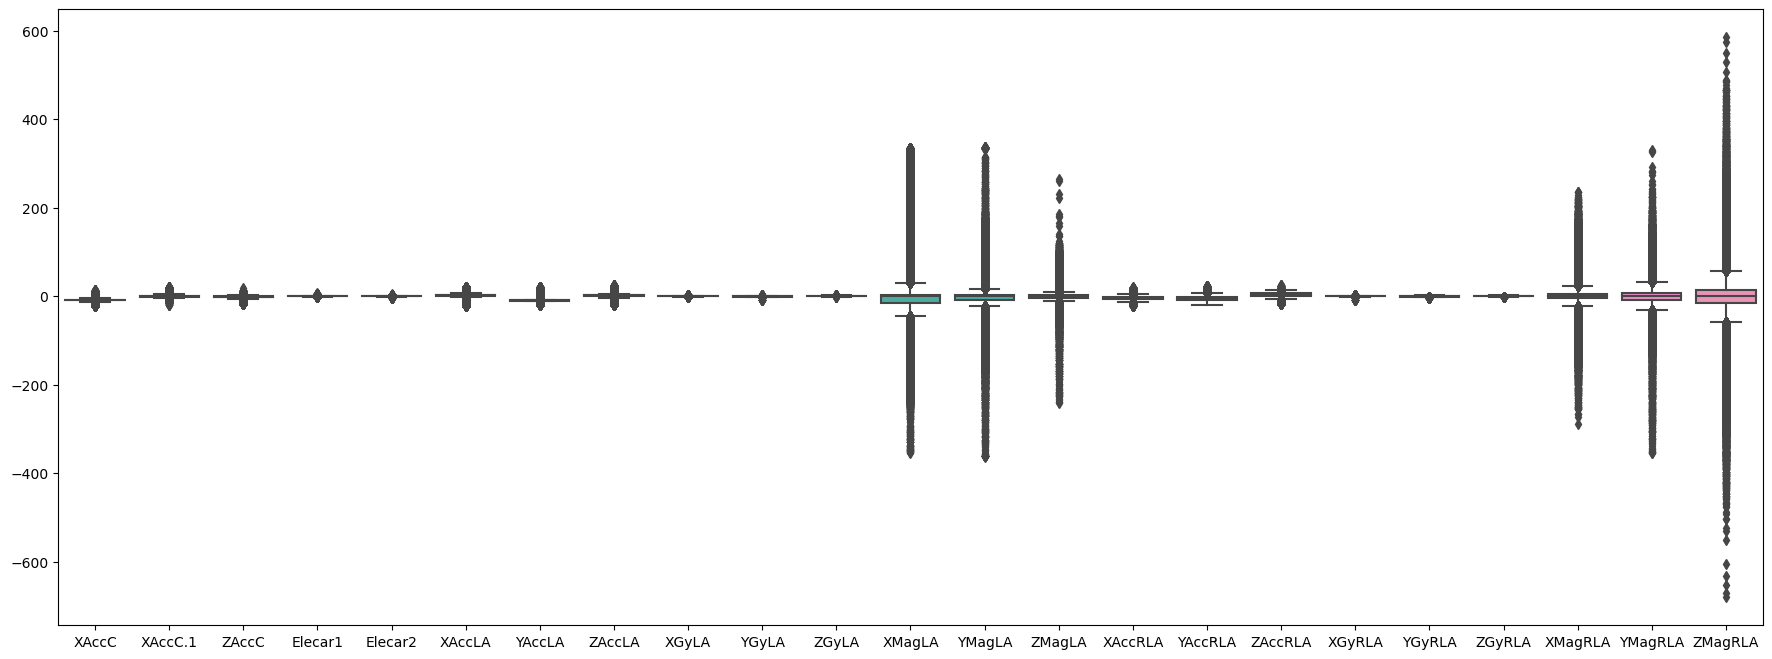

In [13]:
# plot to show the raw data to check the outliners
plt.figure(figsize=(22,8))
sns.boxplot(data=Xdata)
plt.show()

In [14]:
# Robust Scaling technique to removes the median and scales the data according to the Quartile range 
RS = RobustScaler()
Xdata = RS.fit_transform(Xdata)

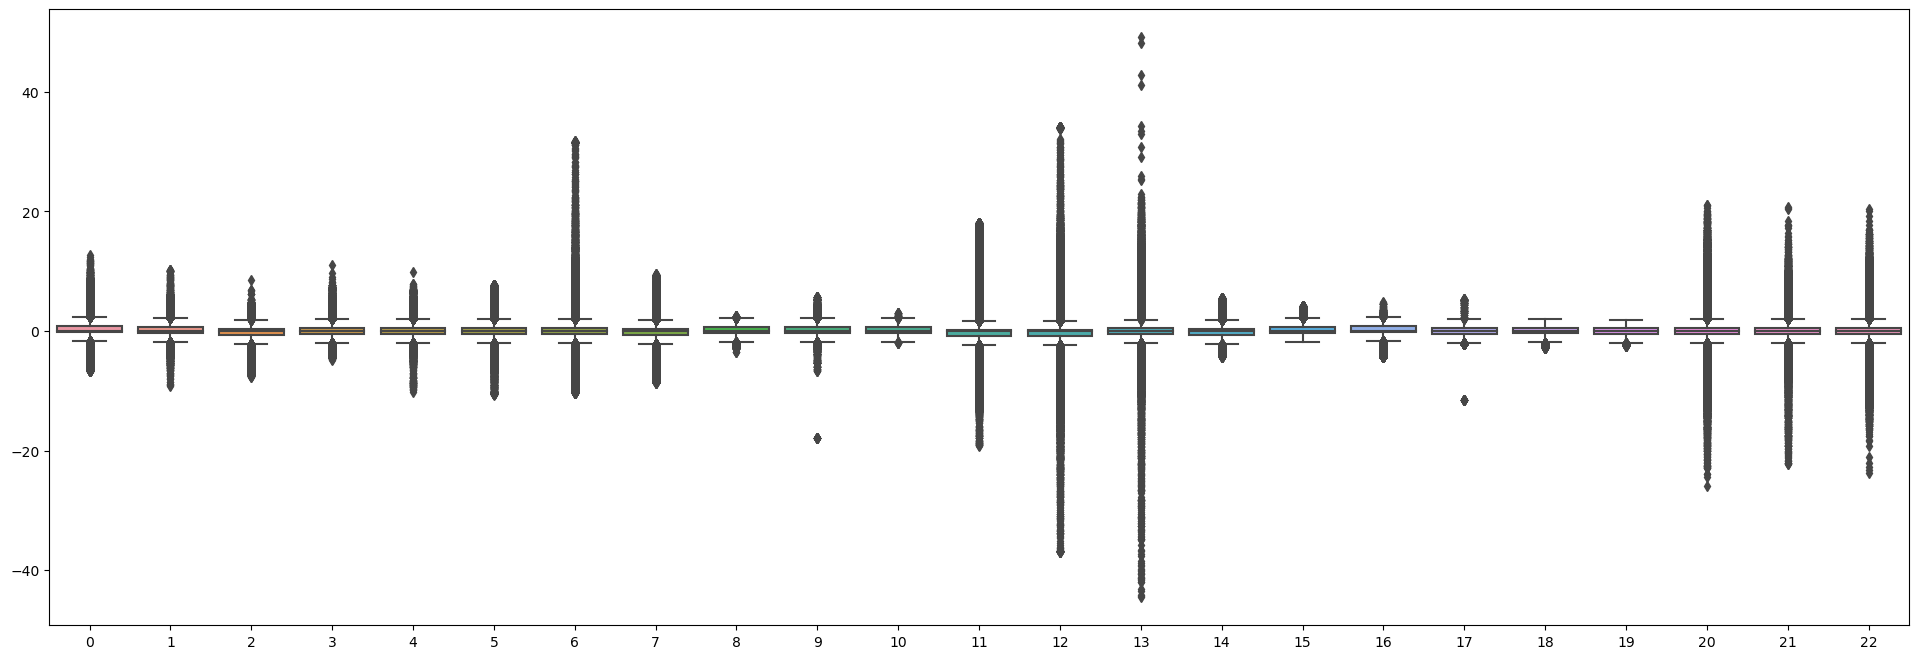

In [15]:
# plot to show the Scaled data to the quartile range.
plt.figure(figsize=(24,8))
sns.boxplot(data=Xdata)
plt.show()

Text(0.5, 1.0, 'Samples plot based on activities')

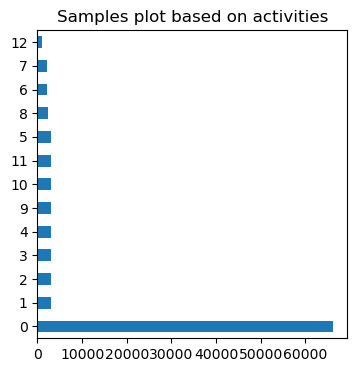

In [16]:
# To check the inbalance data
#let's show this with bar chart
plt.figure(figsize=(4,4))
Ydata.value_counts().plot(kind='barh')
plt.title('Samples plot based on activities')

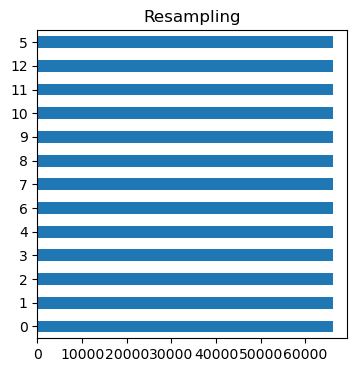

In [17]:
# performing Synthetic Minority Oversampling Technique, (SMOTE) to create by synthesising the current ones.
overSampling = SMOTE()
X_res, y_res = overSampling.fit_resample(Xdata, Ydata)
plt.figure(figsize=(4,4))
ax = y_res.value_counts().plot(kind='barh')
_ = ax.set_title("Resampling")

In [18]:
#Split data into random train and test subsets (30% Test dataset, 70% training dataset).
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size=0.3, random_state=101)
y_train1 = np.ravel(y_train1)
print ('X_Train Set' ,X_train1.shape)
print ('X_Test Set' ,X_test1.shape)
print ('Y_Train Set' ,y_train1.shape)
print ('Y_Test Set' ,y_test1.shape)

X_Train Set (601500, 23)
X_Test Set (257787, 23)
Y_Train Set (601500,)
Y_Test Set (257787,)


# Declaring functions for Machine Learning algorithm and metrics

In [19]:
# Function for Algorithm
def MLAlgorithm (model, X_train, y_train,X_test,y_test):
    # We fit our model with our train data
    model.fit(X_train, y_train)
    # Then predict results from X_test data
    predy = model.predict(X_test)
    # Then calculate the Accuracy from the model
    Accu = accuracy_score(y_test, predy)
    return predy, Accu

In [20]:
# evaluate a model with cross validation
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
    # evaluate model
    cv_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    return cv_scores

In [21]:
#To plot Error and Accuracy graphs based on the parameters.
def AccuErrPlot(acc, err, refVal, title,Xlabel):
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(6,4))
    # make a plot
    ax.plot(refVal,acc,color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=5, label = 'Accuracy')
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(refVal,err,color='green', linestyle='dashed', marker='X',markerfacecolor='green', markersize=5, label = 'Error')
    # set x-axis label
    ax.set_xlabel(Xlabel, fontsize = 14)
    # set y-axis label
    ax.set_ylabel("Accuracy",color="blue",fontsize=14)
    ax2.set_ylabel("Error rate",color="green",fontsize=14)
    plt.title(title)
    plt.show()

In [22]:
#To plot Predicted Values vs Actual Values
def PredvsActuPlot(Actual_Values, Predicted_Values):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    # Defining the axis 
    ax1 = sns.kdeplot(Actual_Values,  color="orange", label='Actual_Values')
    ax2 = sns.kdeplot(Predicted_Values, color="green", label='Predicted_Values', ax=ax1)
    # set Title
    plt.title('Plot of Predicted Value vs Actual Data Distribution')
    # set x-axis label
    plt.xlabel('Human Activities')
    plt.legend(loc="best")
    plt.show()
    plt.close()

In [23]:
Algorithms =[]
Accuracy = []

In [24]:
#Decision Tree Classifier
DTacc=[]
DTerr=[]
DTdepth = []
for i in range(7,16,2):
    DTdepth.append(i)
    DecisionTreeTest = DecisionTreeClassifier(max_depth = i, random_state = 42)
    predy_dt_test, DT_acc = MLAlgorithm(DecisionTreeTest,X_train1,y_train1,X_test1,y_test1)
    DTacc.append(DT_acc)
    DTerr.append(mean(predy_dt_test != y_test1))

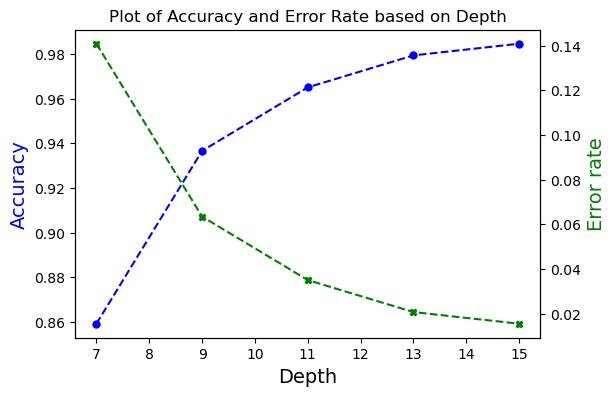

In [25]:
AEP_Title = 'Plot of Accuracy and Error Rate based on Depth'
X_label = 'Depth'
AccuErrPlot(DTacc, DTerr, DTdepth, AEP_Title, X_label)

In [26]:
# As we can see from the graph, after the depth 11 the accuracy and error rate are showning some sudden deviation. 
#Hence assuming the depth as 11 for Decision Tree algorithm
AlgorithmName = 'DecisionTree'
depth = 11
DecisionT = DecisionTreeClassifier(max_depth = depth, random_state = 42)
predy_dt, DT_Accuracy = MLAlgorithm(DecisionT,X_train1,y_train1,X_test1,y_test1)
Algorithms.append(AlgorithmName)
Accuracy.append(DT_Accuracy)

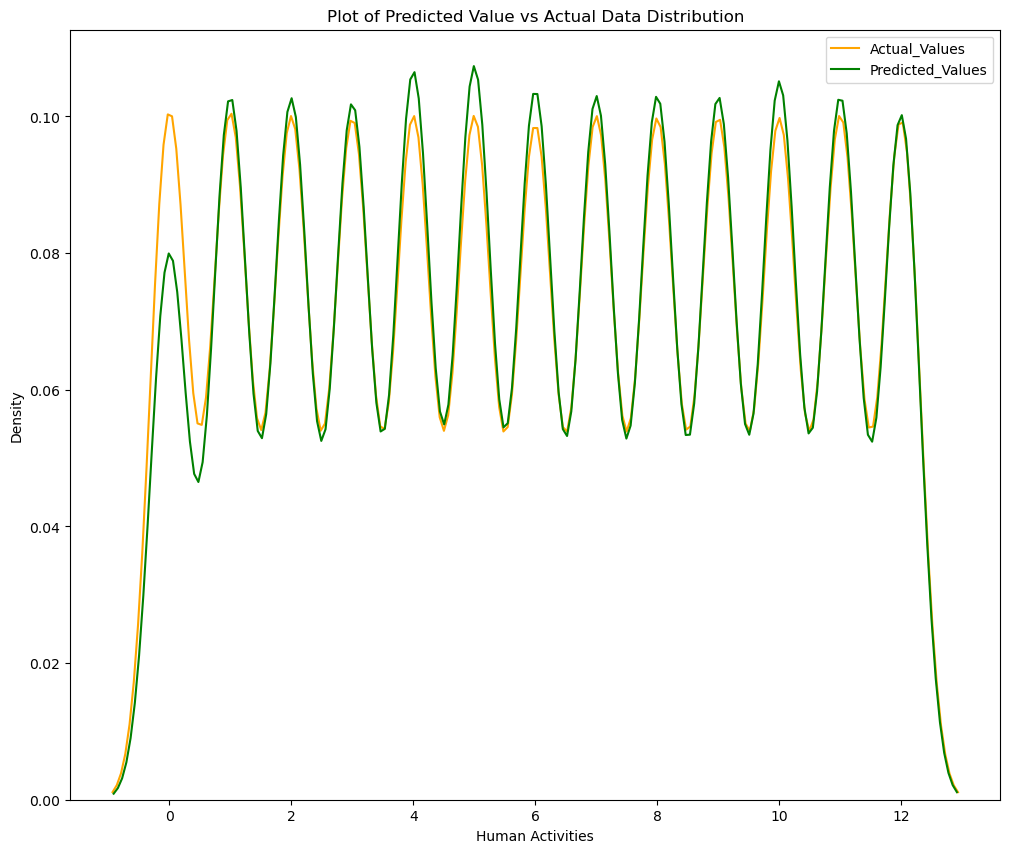

In [27]:
PredvsActuPlot(y_test1, predy_dt)

In [28]:
dtScores = evaluate_model(X_train1,y_train1, DecisionT)

In [29]:
#Random Forest Classifier
RFacc=[]
RFerr=[]
RFdepth = []
for i in range(3,20,2):
    RFdepth.append(i)
    RandomForestTest = RandomForestClassifier(max_depth = i)
    predy_rf_test, RF_acc = MLAlgorithm(RandomForestTest,X_train1,y_train1,X_test1,y_test1)
    RFacc.append(RF_acc)
    RFerr.append(mean(predy_rf_test != y_test1))

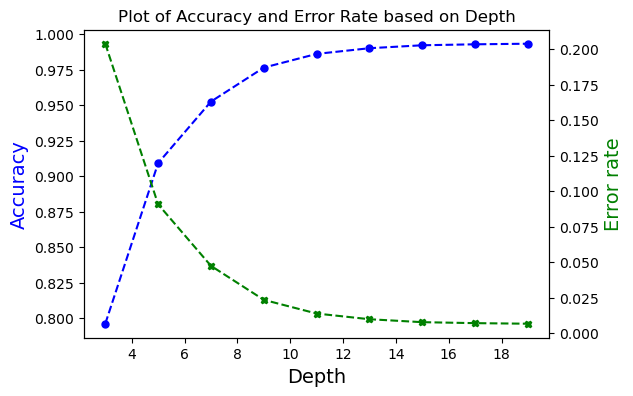

In [30]:
AEP_Title = 'Plot of Accuracy and Error Rate based on Depth'
X_label = 'Depth'
AccuErrPlot(RFacc, RFerr, RFdepth, AEP_Title, X_label)

In [31]:
# As we can see from the graph, after the depth 11 the accuracy and error rate are showning some sudden deviation. 
#Hence assuming the depth as 11 for Random Forest algorithm
AlgorithmName='RandomForest'
RandomForest = RandomForestClassifier(max_depth = 11)
predy_rf, RF_Accuracy = MLAlgorithm(RandomForest,X_train1,y_train1,X_test1, y_test1)
Algorithms.append(AlgorithmName)
Accuracy.append(RF_Accuracy)

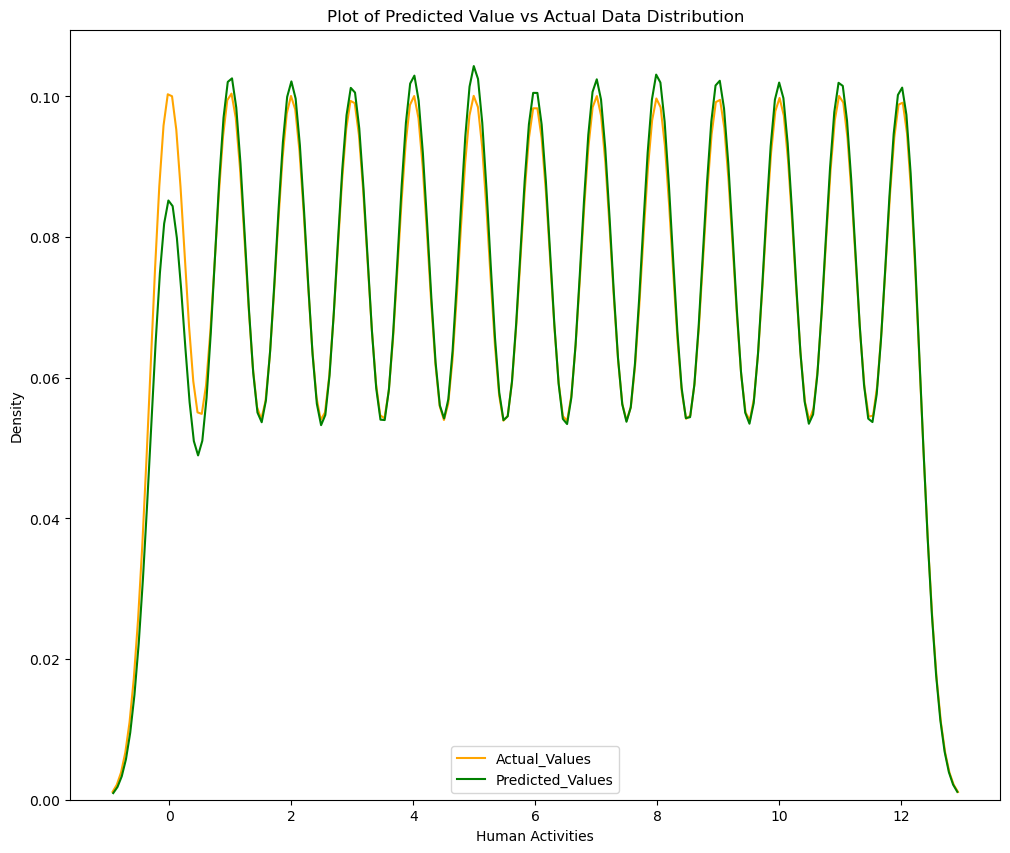

In [32]:
PredvsActuPlot(y_test1, predy_rf)

In [33]:
rfScores = evaluate_model(X_train1,y_train1, RandomForest)

In [34]:
#KNN Classifier
kacc=[]
kerr=[]
kvalue=[]
for k in range(17,30, 2):
    kvalue.append(k)
    KnnTest = KNeighborsClassifier(n_neighbors=k, n_jobs =-1)
    predy_k_test, Knn_Acc = MLAlgorithm(KnnTest,X_train1,y_train1,X_test1, y_test1)
    kacc.append(Knn_Acc)
    kerr.append(mean(predy_k_test != y_test1))
    print("Accuracy=",Knn_Acc, "K= ",k)

Accuracy= 0.9854957775217524 K=  17
Accuracy= 0.9849526935027756 K=  19
Accuracy= 0.9843746969397216 K=  21
Accuracy= 0.9838548879501293 K=  23
Accuracy= 0.9834049040486914 K=  25
Accuracy= 0.9830014702060228 K=  27
Accuracy= 0.9826174322211748 K=  29


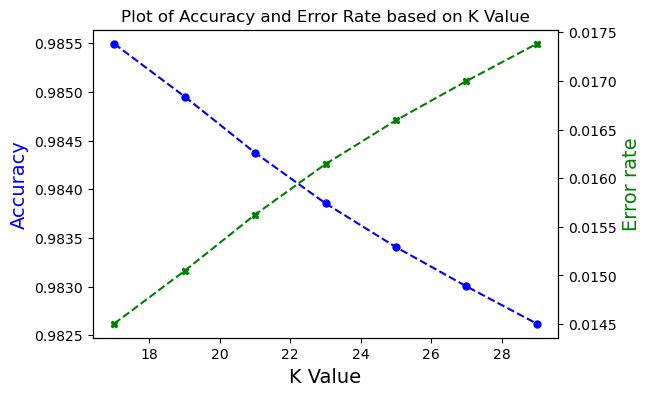

In [35]:
AEP_Title = 'Plot of Accuracy and Error Rate based on K Value'
X_label = 'K Value'
AccuErrPlot(kacc, kerr, kvalue, AEP_Title, X_label)

In [36]:
# As we can see from the above graph, after the k value =19 the accuracy and error rate are showning some stable accuracy and error rate till k=27. 
# Hence assuming the k value as 19 for Knn algorithm
AlgorithmName='Knn'
kValue= 19
Knn = KNeighborsClassifier(n_neighbors=kValue, n_jobs =-1)
predy_knn, KNN_Accuracy = MLAlgorithm(Knn,X_train1,y_train1,X_test1, y_test1)
Algorithms.append(AlgorithmName)
Accuracy.append(KNN_Accuracy)

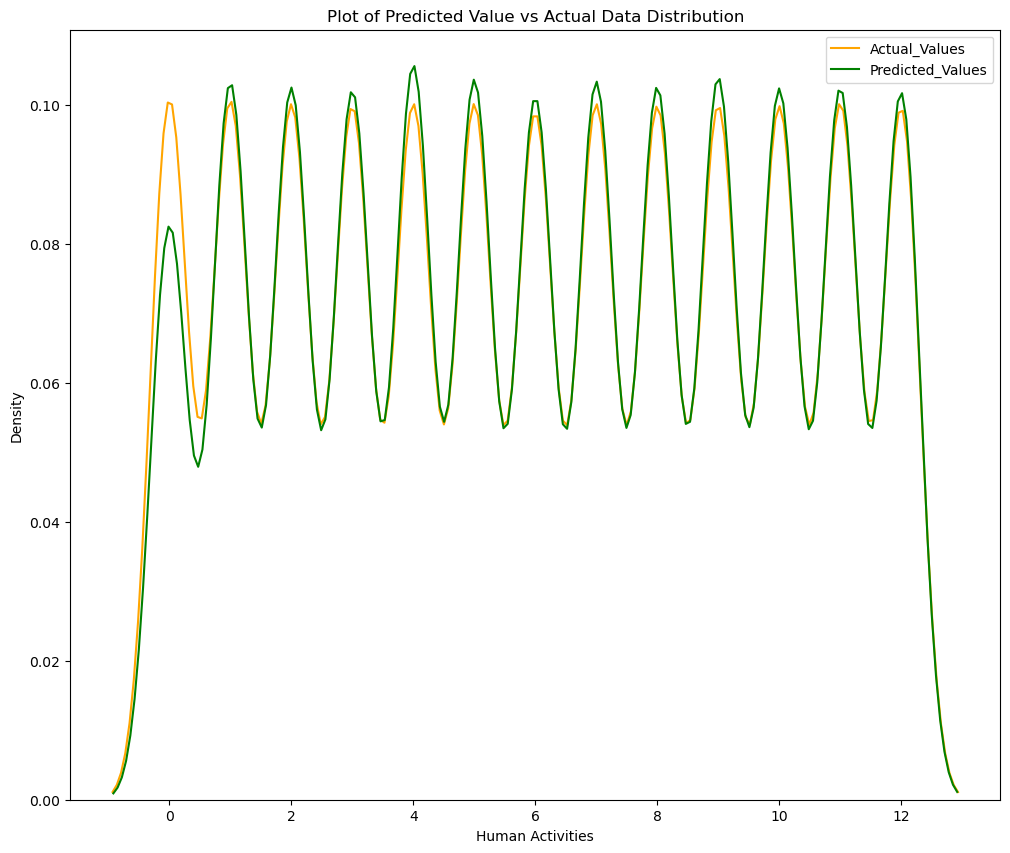

In [37]:
PredvsActuPlot(y_test1, predy_knn)

In [38]:
knnScores = evaluate_model(X_train1,y_train1, Knn)

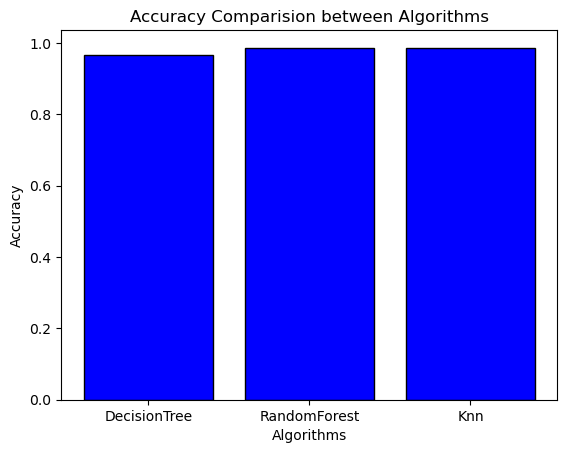

In [45]:
#Plot for Accuracy vs Algorithms
plt.bar(Algorithms, Accuracy, color='blue', ec='black')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision between Algorithms')
plt.show()

In [42]:
#Printing the Scores and Standard deviation.
print("======== Decision Tree Algorithm ===========")
print("Accuracy of Decision Tree Algorithm is: ",DT_Accuracy*100)
print('Cross Validation Mean Accuracy of Decision Tree Algorithm: %.3f (%.3f)' % (mean(dtScores), std(dtScores)))
print("======== Random Forest Algorithm ===========")
print("Accuracy of Random Forest Algorithm is: ",RF_Accuracy*100)
print('Cross Validation Mean Accuracy of Random Forest Algorithm: %.3f (%.3f)' % (mean(rfScores), std(rfScores)))
print("======== Knn Algorithm ===========")
print("Accuracy of Knn Algorithm is: ",KNN_Accuracy*100)
print('Cross Validation Mean Accuracy of Knn Algorithm: %.3f (%.3f)' % (mean(knnScores), std(knnScores)))

======== Decision Tree Algorithm ===========
Accuracy of Decision Tree Algorithm is:  0.9649904766338101
Cross Validation Mean Accuracy of Decision Tree Algorithm: 0.966 (0.001)
======== Random Forest Algorithm ===========
Accuracy of Random Forest Algorithm is:  0.9864306578687055
Cross Validation Mean Accuracy of Random Forest Algorithm: 0.986 (0.000)
======== Knn Algorithm ===========
Accuracy of Knn Algorithm is:  98.49526935027755
Cross Validation Mean Accuracy of Knn Algorithm: 0.983 (0.000)


## 